# Приоритизация гипотез и анализ A/B-теста 

Есть список гипотез для увеличения выручки. Приоритизируем гипотезы, запустим A/B-тест.

В файле hypothesis 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Результаты  A/B-теста описаны в файлах orders и visitors.

<h1>План исследования<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-подготовка-их-к-анализу" data-toc-modified-id="Загрузка-данных-и-подготовка-их-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и подготовка их к анализу</a></span><ul class="toc-item"><li><span><a href="#Таблица-с-информацией-о-пользователях---visitors" data-toc-modified-id="Таблица-с-информацией-о-пользователях---visitors-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Таблица с информацией о пользователях - visitors</a></span><ul class="toc-item"><li><span><a href="#Общая-информация" data-toc-modified-id="Общая-информация-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Общая информация</a></span></li><li><span><a href="#Пропуски-и-дубликаты" data-toc-modified-id="Пропуски-и-дубликаты-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Пропуски и дубликаты</a></span></li></ul></li><li><span><a href="#Таблица-с-информацией-о-заказах---orders" data-toc-modified-id="Таблица-с-информацией-о-заказах---orders-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Таблица с информацией о заказах - orders</a></span><ul class="toc-item"><li><span><a href="#Общая-информация" data-toc-modified-id="Общая-информация-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Общая информация</a></span></li><li><span><a href="#Пропуски-и-дубликаты" data-toc-modified-id="Пропуски-и-дубликаты-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Пропуски и дубликаты</a></span></li></ul></li><li><span><a href="#Таблица-с-информацией-о-гипотезах---hypothesis" data-toc-modified-id="Таблица-с-информацией-о-гипотезах---hypothesis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Таблица с информацией о гипотезах - hypothesis</a></span><ul class="toc-item"><li><span><a href="#Общая-информация" data-toc-modified-id="Общая-информация-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Общая информация</a></span></li><li><span><a href="#Пропуски-и-дубликаты" data-toc-modified-id="Пропуски-и-дубликаты-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Пропуски и дубликаты</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Приоритизация гипотез</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Кумулятивные-метрики" data-toc-modified-id="Кумулятивные-метрики-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Кумулятивные метрики</a></span></li><li><span><a href="#Анализ-выбросов-и-всплесков" data-toc-modified-id="Анализ-выбросов-и-всплесков-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ выбросов и всплесков</a></span></li><li><span><a href="#Результаты-теста" data-toc-modified-id="Результаты-теста-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Результаты теста</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

### Загрузка данных и подготовка их к анализу

In [1]:
# имортируем библиотеки
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
from pathlib import Path
import re
import scipy.stats as stats

In [2]:
# добавим форматирование вещественных чисел и темную тему для графиков
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_colwidth = 200
plt.style.use('dark_background')

In [3]:
# откроем табл
try:
    visitors, orders, hypothesis = (
        pd.read_csv(Path.cwd() /'datasets'/'visitors.csv'),
        pd.read_csv(Path.cwd() /'datasets'/'orders.csv'),
        pd.read_csv(Path.cwd() /'datasets'/'hypothesis.csv')
    )
except:
    print('не удалось открыть файлы')

#### Таблица с информацией о пользователях - visitors

##### Общая информация

In [4]:
# посмотрим первые 10 строк табл visitors
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [5]:
# выведем основную информацию о датафрейме visitors и его размерность
visitors.info()
visitors.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


(62, 3)

Структура данных
 - date — дата;
 - group — группа A/B-теста;
 - visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

In [6]:
#изменим типы данных в session_start, session_end
visitors['date'] =  pd.to_datetime(visitors['date'])

In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


##### Пропуски и дубликаты

In [8]:
# выведем кол-во пропусков в столбцах
pd.DataFrame(
    (visitors.isna().sum())
    .to_frame()
    .rename(columns = {0:'space'})
    .sort_values(by = 'space', ascending = True)
).style.background_gradient('coolwarm')

,space
date,0
group,0
visitors,0


In [9]:
# посмотрим кол-во пропусков
visitors.duplicated().sum()

0

#### Таблица с информацией о заказах - orders

##### Общая информация

In [10]:
# посмотрим первые 10 строк табл orders
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [11]:
# выведем основную информацию о датафрейме orders и его размерность
orders.info()
orders.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


(1197, 5)

Структура данных
 - transactionId — идентификатор заказа;
 - visitorId — идентификатор пользователя, совершившего заказ;
 - date — дата, когда был совершён заказ;
 - revenue — выручка заказа;
 - group — группа A/B-теста, в которую попал заказ.

In [12]:
# переименуем столбцы, чтобы именование было в snake case, 
# добавим нижнеее подчеркивание перед заглавной буквой и приведем к нижнему регистру
orders.columns = [re.sub( '(?<!^)(?=[A-Z])', '_', col ).lower() for col in orders.columns]

In [13]:
#изменим типы данных в event_dt
orders['date'] = pd.to_datetime(orders['date'])

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


##### Пропуски и дубликаты

In [15]:
# выведем кол-во пропусков в столбцах
pd.DataFrame(
    (orders.isna().sum())
    .to_frame()
    .rename(columns = {0:'space'})
    .sort_values(by = 'space', ascending = True)
).style.background_gradient('coolwarm')

,space
transaction_id,0
visitor_id,0
date,0
revenue,0
group,0


In [16]:
# посмотрим кол-во пропусков
orders.duplicated().sum()

0

In [17]:
# посмотрим кол-во пользователей, которые участвуют в двух тестах
orders_by_visitor = (orders
                     .groupby(by='visitor_id')
                     .agg({'group': 'nunique'})
                     .sort_values(by='group', ascending=False)
                     .reset_index()
                    )
orders_by_visitor.columns = ['visitor_id', 'cnt_group'] 

visitor_id_double = orders_by_visitor.query('cnt_group==2')['visitor_id']
print(visitor_id_double.count())

58


В данных есть 58 пользователей - 5% от общего числа пользователей, которые попали в обе группы. Таких польльзователей оставим, т.к. данные надо будет также удалить из таблицы с пользователями.

####  Таблица с информацией о гипотезах - hypothesis

#####  Общая информация

In [18]:
# посмотрим первые 10 строк табл hypothesis
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [19]:
# выведем основную информацию о датафрейме hypothesis и его размерность
hypothesis.info()
hypothesis.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


(9, 5)

Структура данных
 - Hypothesis — краткое описание гипотезы;
 - Reach — охват пользователей по 10-балльной шкале;
 - Impact — влияние на пользователей по 10-балльной шкале;
 - Confidence — уверенность в гипотезе по 10-балльной шкале;
 - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [20]:
# переименуем столбцы, чтобы именование было в snake case,приведем к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

In [21]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


##### Пропуски и дубликаты

In [22]:
# выведем кол-во пропусков в столбцах
pd.DataFrame(
    (hypothesis.isna().sum())
    .to_frame()
    .rename(columns = {0:'space'})
    .sort_values(by = 'space', ascending = True)
).style.background_gradient('coolwarm')

,space
hypothesis,0
reach,0
impact,0
confidence,0
efforts,0


In [23]:
# посмотрим кол-во пропусков
hypothesis.duplicated().sum()

0

#### Выводы

 Мы:
 - Заметили, что в таблицах отсутствуют пустые строки и дубликаты;
 - Поменяли типы данных в таблицах;
 - Переименовали столбцы.

### Приоритизация гипотез


In [24]:
# способ приоритизации задач методом ICE
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы по ICE:
 - Запустить акцию, дающую скидку на товар в день рождения,
 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей,
 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. 

Менее перспективные гипотезы:
 - Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов,
 - Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар,
 - Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей.

In [25]:
# способ приоритизации задач методом RICE
hypothesis['RICE'] = (hypothesis['reach'] 
                      * hypothesis['impact'] 
                      * hypothesis['confidence'])/hypothesis['efforts']
print(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

Наиболее перспективные гипотезы по RICE:
 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

Менее перспективные гипотезы:
 - Запустить собственную службу доставки, что сократит срок доставки заказов
 - Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
 - Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей

#### Выводы

Гипотезы Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок и Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей вошли в топ 3 наиболее перспективных гипотез и методом ICE и RICE. Гипотезы Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов и Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей вошли в топ 3 не перспективных гипотез. Остальные гипотезы распределились по разному.

Гипотеза Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок стала самой перспективной методом RICE из-за кол-ва затронутых изменением пользователей. Гипотеза Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа вошла в топ также из-за высокого значения параметра reach.

Гипотеза Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар с высоким параметром reach не вошла в топ гипотез из-за небольшого влияния на пользователей (impact) и небольшой уверенности в гипотезе (confidence), но высоких затрат ресурсов на проверку гипотезы (efforts).

### Анализ A/B-теста

#### Кумулятивные метрики

In [26]:
# массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

# агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# агрегированные кумулятивные по дням данные о заказах
cumulativeData = ordersAggregated.merge(
    visitors, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


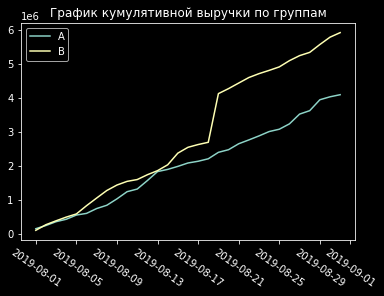

In [27]:
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(rotation=-35)

plt.title('График кумулятивной выручки по группам')

plt.legend();

Выручка увеличивается на протяжении всего периода. В группе В выручка больше.

Графики выручки группы В в одной точке резко растет, еще в нескольких немного. В группе А в одной точке резко растет. Это может сигнализировать о всплесках чисал заказов, либо о появлении очень дорогих заказов в выборке. 

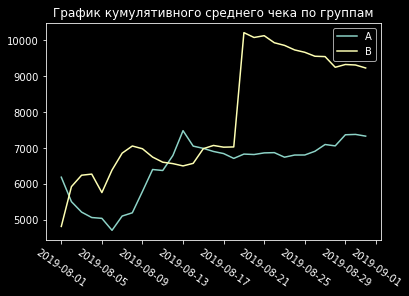

In [28]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=-35)
plt.title('График кумулятивного среднего чека по группам')
plt.legend();

Средний чек неравномерный. Есть спады и подъемы. Ближе к концу теста значения немного стабилизировались. В группе В 18 августа был резкий скачок. Скорей всего был сделан крупный заказ.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


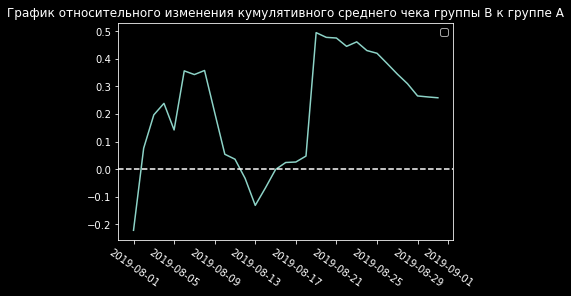

In [29]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='white', linestyle='--') 

plt.xticks(rotation=-35)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.legend();

В нескольких точках график различия между сегментами резко «скачет». Где-то есть крупные заказы и выбросы.

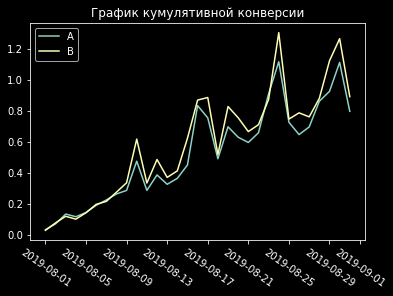

In [30]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
 
plt.xticks(rotation=-35)
plt.title('График кумулятивной конверсии')
plt.legend();

Конверсия в обеих группах "скачет" одинаково. В группе В конверсия чуть выше.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


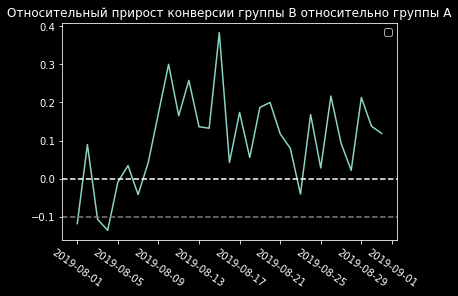

In [31]:
# объеденим кумулятивную конверсию групп А и В
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], 
    left_on='date', right_on='date', 
    how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.legend()

plt.axhline(y=0, color='white', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.xticks(rotation=-35)
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.legend();

В начале теста группа А ледировала, но потом группа В вышла вперед и держалась впереди почти на протяжении всего теста. Отношение конверсии ещё не установилось.

#### Анализ выбросов и всплесков

In [32]:
# число заказов по пользователям
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
).sort_values(by='transaction_id', ascending=False)

ordersByUsers.columns = ['visitor_id', 'orders']
ordersByUsers.head()

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


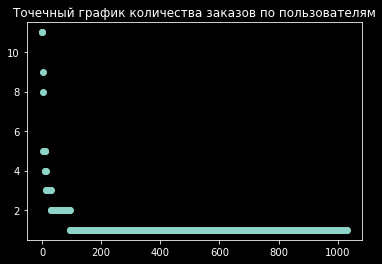

In [33]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям');

В основном все пользователи совершили по одному заказу, однако есть те, кто совершил больше одного заказа, но их число мало. Посмотрим 1% и 5% стоимости заказов с крайними значениями, чтобы точно определиться.

In [34]:
# 95-й и 99-й выборочные перцентили количества заказов по пользователям
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли больше двух заказов. И 1% пользователей заказывали более четырех раз. Будем отсеивать больше двух заказов.

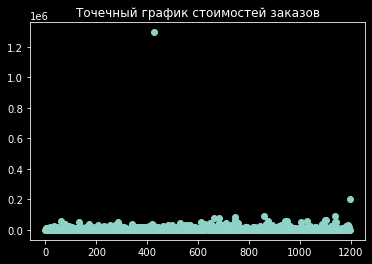

In [35]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов');

Есть несколько дорогих заказов. По графику можно выбрать границу аномальных заказов между 20 000 и 30 000 рублей. Посмотрим 1% и 5% стоимости заказов с крайними значениями, чтобы точно определиться.

In [36]:
# 95-й и 99-й выборочные перцентили стоимости заказови
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей. Будем отсеивать заказы дороже 28 000.

#### Результаты теста

Сформулируем гипотезы

$\begin{equation*}
 \begin{cases}
   H_0 :\text{различий в среднем количестве заказов между группами нет.}\\
   H_1 :\text{различия в среднем между группами есть}
 \end{cases}
\end{equation*}$

$\begin{equation*}
 \begin{cases}
   H_0 :\text{различий в среднем чеке заказов между группами нет.}\\
   H_1 :\text{различия в среднем между группами есть}
 \end{cases}
\end{equation*}$

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей. 

Подготовим данные.

In [37]:
# дни посещения сайта группой А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitors_per_date_A']

# дни посещения сайта группой А с накоплением
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_A': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitors_cummulative_A']

# дни посещения сайта группой В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitors_per_date_B']

# дни посещения сайта группой В с накоплением
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_B': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitors_cummulative_B']

# заказы по дням группой А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']

# заказы с накоплением по дням группой А 
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_A': 'sum', 'revenue_per_date_A': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'orders_cummulative_A',
    'revenue_cummulative_A',
]

# заказы по дням группой В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']

# заказы с накоплением по дням группой В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_B': 'sum', 'revenue_per_date_B': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'orders_cummulative_B',
    'revenue_cummulative_B',
]

# соединим все таблицы вместе
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [38]:
data.head()

,date,orders_per_date_A,revenue_per_date_A,orders_per_date_B,revenue_per_date_B,orders_cummulative_A,revenue_cummulative_A,orders_cummulative_B,revenue_cummulative_B,visitors_per_date_A,visitors_per_date_B,visitors_cummulative_A,visitors_cummulative_B
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [39]:
# заказы пользователей группы А
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

# заказы пользователей группы В
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

# выборка, где каждый элемент — число заказов определённого пользователя группы А, в том числе ноль
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitors_per_date_A'].sum() - len(ordersByUsersA['orders'])), 
                     name='orders')],axis=0)

# выборка, где каждый элемент — число заказов определённого пользователя группы В, в том числе ноль
sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitors_per_date_B'].sum() - len(ordersByUsersB['orders'])), 
                     name='orders')],axis=0)

In [40]:
# статистическую значимость различия среднего количества заказов

# p-value для сравнения среднего между группами
print("{0}: {1:.3f}".format('p-value для сравнения среднего между группами', 
                            stats.mannwhitneyu(sampleA, sampleB)[1]))

# относительное различие в среднем между группами
print("{0}: {1:.3f}".format('Относительное различие в среднем между группами',
                            sampleB.mean() / sampleA.mean() - 1))

p-value для сравнения среднего между группами: 0.017
Относительное различие в среднем между группами: 0.138


По «сырым» данным есть различия в среднем числе заказов групп A и B. 

p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выиграш группы B равен 13.8%.

In [41]:
# статистическую значимость различия средних чеков между группами.

# p-value для сравнения средних чеков между группами
print('{0}: {1:.3f}'.format('p-value для сравнения средних чеков между группами',
    stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                       orders[orders['group']=='B']['revenue'])[1])
     )

# относительный прирост среднего чека группы B
print('{0}: {1:.3f}'.format('Относительный прирост среднего чека группы B',
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)
     )

p-value для сравнения средних чеков между группами: 0.729
Относительный прирост среднего чека группы B: 0.259


По «сырым» данным нет различий в среднем чеке групп A и B. 

P-value = 0.729 больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Относительный прирост среднего чека группы В 25.9%.

In [42]:
# отсеим заказы больше двух и дороже 30000
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitor_id'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitor_id']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_A'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_B'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Сформулируем гипотезы

$\begin{equation*}
 \begin{cases}
   H_0 :\text{различий в среднем количестве заказов в очищенных данных между группами нет.}\\
   H_1 :\text{различия в среднем в очищенных данных между группами есть}
 \end{cases}
\end{equation*}$

$\begin{equation*}
 \begin{cases}
   H_0 :\text{различий в среднем чеке заказов в очищенных данных между группами нет.}\\
   H_1 :\text{различия в среднем в очищенных данных между группами есть}
 \end{cases}
\end{equation*}$

In [47]:
# статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным

# p-value для сравнения среднего между группами
print('{0}: {1:.3f}'.format('p-value для сравнения среднего между группами', 
                            stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

# относительное различие в среднем между группами
print('{0}: {1:.3f}'.format('относительное различие в среднем между группами', 
                            sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value для сравнения среднего между группами: 0.013
относительное различие в среднем между группами: 0.173


По очищенным данным есть различия в среднем числе заказов групп A и B. 

p-value = 0.013 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов в очищенных данных между группами нет, отвергаем. Относительный выиграш группы B равен 17.3%.

Результаты по среднему количеству заказов практически не изменились.

In [46]:
# статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

# p-value для сравнения средних чеков между группами
print(
    '{0}:  {1:.3f}'.format('p-value для сравнения средних чеков в между группами',
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

# относительный прирост среднего чека группы B
print(
    "{0}:  {1:.3f}".format('относительный прирост среднего чека группы B',
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value для сравнения средних чеков в между группами:  0.738
относительный прирост среднего чека группы B:  -0.020


По очищенным данным нет различий в среднем чеке групп A и B.

p-value = 0.738 больше 0.05. Причин отвергать нулевую гипотезу и считать, что в среднем чеке в очищенных данных есть различия, нет.

Результаты p-value не изменились. Однако прирост среднего чека очищенных данных у группы B значительно ниже. Т.е. дорогие заказы очень сильно влияли на группу В.

### Выводы

Наиболее перспективными гипотезы Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок и Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей, они вошли в топ 3 наиболее перспективных гипотез и методом ICE и RICE. Гипотезы Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов и Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей вошли в топ 3 не перспективных гипотез. 
Рекомендую рассмотреть гипотезы Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок и Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей для реализации.

Гипотеза Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок стала самой перспективной методом RICE из-за кол-ва затронутых изменением пользователей. Гипотеза Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа вошла в топ также из-за высокого значения параметра reach.

Гипотеза Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар с высоким параметром reach не вошла в топ гипотез из-за небольшого влияния на пользователей (impact) и небольшой уверенности в гипотезе (confidence), но высоких затрат ресурсов на проверку гипотезы (efforts).

Оценили результаты A/B-теста визуально:
 - Выручка увеличивается на протяжении всего периода. В группе В выручка больше. Также в группе В есть аномалия, которая видна на графике кумулятивного среднего чека. В группе В 18 августа был резкий скачок. Скорей всего был сделан крупный заказ.
 - Конверсия в обеих группах похожа: спады и подъемы происходили одинаково. В группе В конверсия чуть выше. В начале теста группа А ледировала, но потом группа В вышла вперед и держалась впереди почти на протяжении всего теста.
 
Увидели выбросы и нашли границу для их определения:
 - В основном все пользователи совершили по одному заказу, однако есть те, кто совершил больше одного заказа, но их число мало. Не более 5% пользователей оформляли больше двух заказов. И 1% пользователей заказывали более четырех раз. Аномальными считаем больше 2 заказов.
 - Есть несколько дорогих заказов. По графику можно выбрать границу аномальных заказов между 20 000 и 30 000 рублей. Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей. Аномальными будем считать заказы дороже 28 000.
 
Рассмотрели гипотезу о равенстве среднего кол-ва закозов в каждой группе:
 - По «сырым» и очищенным данным есть различия в среднем числе заказов групп A и B. Нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергли. Относительный выиграш группы B "сырых" данных равен 13.8%, а очищенных 17.2%.

Рассмотрели гипотезу о равенстве среднего чека закозов в каждой группе:
 - По «сырым» и очищенным данным различия в среднем чеке заказов групп A и B нет. Нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказов между группами нет, не отвергли. Относительный прирост группы B "сырых" данных равен 25.9%, а в очищенных данных был относительный прирост группы А на 2.3%.

По результат теста предлагаю остановиться и зафиксировать отсутствие различий между группами. В группах похожая конверсия, по кол-ву заказов лидирует группа В, однако по среднему чеку в очищенных данных выигрывает группа А, несмотря на относительный проигрыш в количесве на 17%.

Однако не стоит забывать, что 58 пользователей попали в две группы.